### Find the best number of PCA componentes in a dataframe

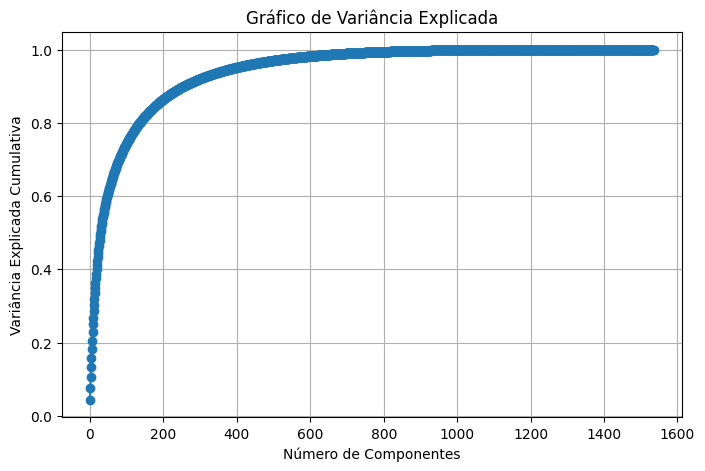

: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carrega o DataFrame
df = pd.read_pickle('../datasets/brquad-gte-dev-v2.0_embedded_with_document_names_and_answers.pkl')

# Supondo que 'df['embedding']' contém os embeddings
X = np.stack(df['embedding'].values)

# Como os embeddings podem já estar em uma escala adequada, a padronização é opcional.
# Remova a padronização se achar que não é necessária para os seus dados.
X_standardized = StandardScaler().fit_transform(X)

# Cria uma instância PCA sem restringir o número de componentes e ajusta aos dados
pca = PCA()
pca.fit(X_standardized)

# Variância explicada cumulativa
variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)

# Plota o gráfico da variância explicada cumulativa
plt.figure(figsize=(8, 5))
plt.plot(variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Gráfico de Variância Explicada')
plt.grid(True)
plt.show()
